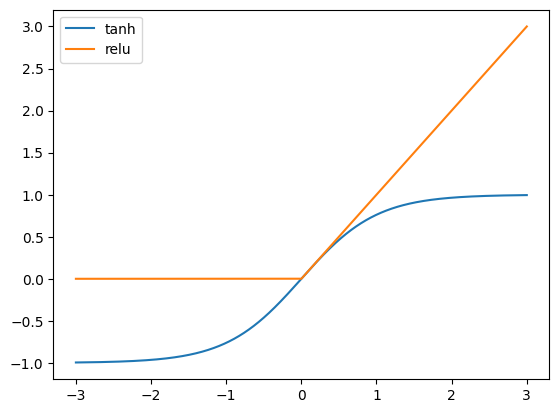

In [2]:
### 绘制 relu 和 tanh 曲线

import numpy as np
from matplotlib import pyplot as plt

line = np.linspace(-3, 3, 10000)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(0, line), label='relu')
plt.legend(loc='best')

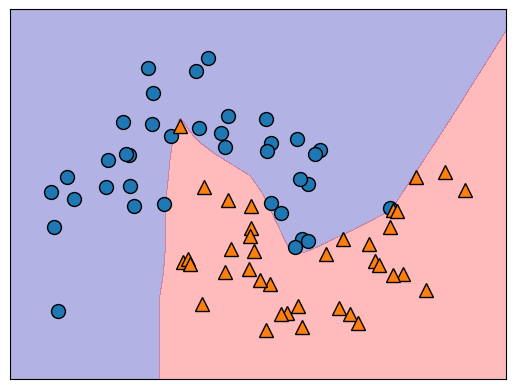

In [3]:
### 使用单个隐层的感知机

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0)
mlp.fit(X_train, y_train)

from mglearn.plots import plot_2d_separator
plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)

from mglearn import discrete_scatter
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

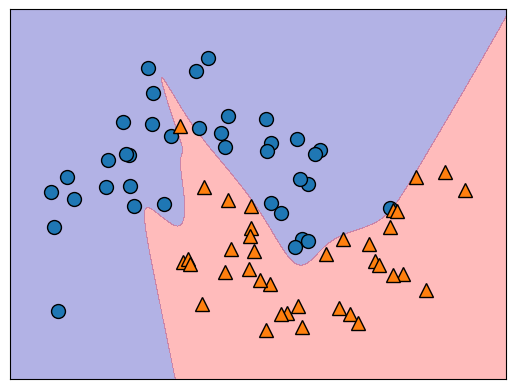

In [4]:
### 使用 2 个隐层的感知机

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    activation='tanh', 
                    hidden_layer_sizes=[10, 10] ## 两个隐层，每层 10 个神经元
                    )
mlp.fit(X_train, y_train)

from mglearn.plots import plot_2d_separator
plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)

from mglearn import discrete_scatter
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)


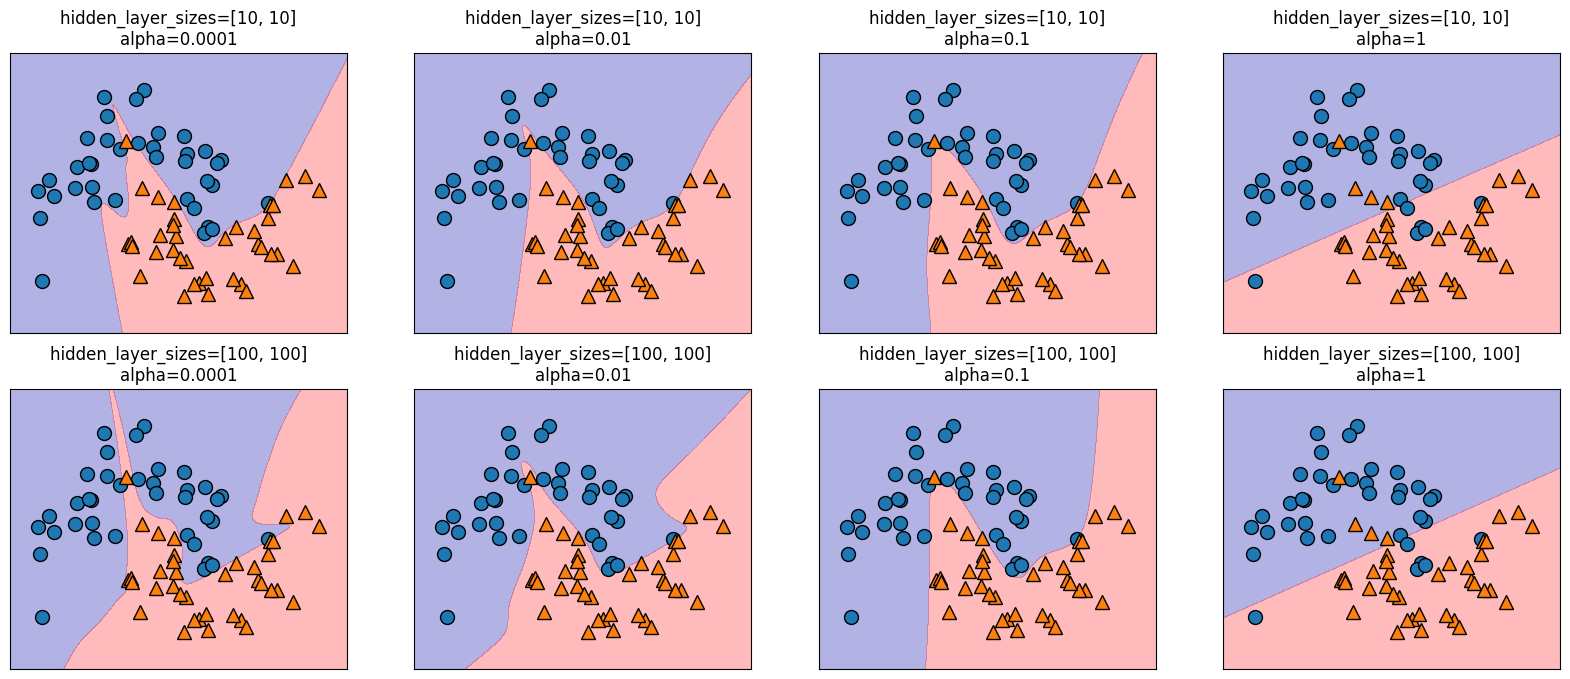

In [5]:
### 比较设置不同的隐层数时，改变 alpha 带来的效果
### alpha 控制的是模型的复杂度，也就是正则化项的强度
### alpha 越大，正则化项的强度也越大，模型也简单，更不容易过拟合

axe_rows = 2
axe_cols = 4

fig, axes = plt.subplots(axe_rows, axe_cols, figsize=(20, 8))

# 两组隐层设置
hidden_layer_arr = [[10, 10], [100, 100]]

# 四种 alpha 设置
alpha_arr = [0.0001, 0.01, 0.1, 1]

# idx 的区间是 0 ～ 7
for idx, ax in enumerate(axes.ravel()):
    hidden_layer_sizes = hidden_layer_arr[idx//axe_cols]
    alpha = alpha_arr[idx%axe_cols]
    
    mlp = MLPClassifier(solver='lbfgs', random_state=0, 
                        activation='tanh',
                        hidden_layer_sizes=hidden_layer_sizes,
                        alpha=alpha,
                        max_iter=1000)
    mlp.fit(X_train, y_train)
    
    plot_2d_separator(mlp, X_train, fill=True, ax=ax, alpha=0.3)
    discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

    ax.set_title(f"hidden_layer_sizes={hidden_layer_sizes}\nalpha={alpha}")

In [6]:
### 神经网络通常要求所有的特征以相似的方式变化，最理想的情况是它们的均值为 0，方差为 1。
### 所以我们一般都需要对输入数据进行缩放，以满足这个要求。

from sklearn.datasets import load_breast_cancer


cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=11)

# 训练集上各个特征的均值和标准差
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

# 按照训练数据进行缩放
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

def show_accuracy(msg, train_data, train_target, test_data, test_target):
    mlp = MLPClassifier(solver='lbfgs', random_state=0, max_iter=1000, 
                        hidden_layer_sizes=[10, 20],
                        alpha=0.8)
    mlp.fit(train_data, train_target)

    print("{} 训练精度: {:.2f}, 测试精度: {:.2f}".format(
        msg,
        mlp.score(train_data, train_target), 
        mlp.score(test_data, test_target)
        ))

# 查看缩放产生的效果
show_accuracy("原始数据", X_train, y_train, X_test, y_test)
show_accuracy("缩放后  ", X_train_scaled, y_train, X_test_scaled, y_test)



原始数据 训练精度: 0.92, 测试精度: 0.93
缩放后   训练精度: 1.00, 测试精度: 0.97


In [7]:
## 输出分类概率
## 当预测一个样本的类别时，它属于该类别的概率（信心）也被计算出来了
## decision_function 就可以输出每个样本的类别概率
## 正值意味着预测它属于 positive class，负值意味着预测它属于 negative class
## 对于二元分类器，分类器的 `classes_` 属性中的第 0 个元素是negative class，第 1 个元素是positive class

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles, make_blobs

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
y_named = np.array(['blue', 'red'])[y]

X_train, X_test, \
    y_train, y_test, \
    y_named_train, y_named_test = train_test_split(X, y, y_named, stratify=y, random_state=2)

gbc = GradientBoostingClassifier(random_state=3)
# 用 'blue' / 'red' 作为训练标签
gbc.fit(X_train, y_named_train)

print("X_test shape = {}\n".format(X_test.shape))

decision_score_test = gbc.decision_function(X_test)
print("Decision scoores of test is {}\n".format(decision_score_test))
print("Decision function shape = {}\n".format(decision_score_test.shape))
print("classes_ 属性的值为 {}\n".format(gbc.classes_))

# 预测为正值，flag 为 1，否则为 0
pred_flag = (gbc.decision_function(X_test) > 0).astype(int)
print("pred_flag = {}\n".format(pred_flag))

pred_class = gbc.classes_[pred_flag]
print("pred_class = {}\n".format(pred_class))

print("测试直接输出标签与推导输出的标签是否一致? {}".format(np.all(gbc.predict(X_test) ==  pred_class)))

X_test shape = (25, 2)

Decision scoores of test is [ 4.5504061  -2.9737811   5.05252288  5.05252288  3.82157303 -3.47713349
  5.05252288 -8.35489454 -2.61513055 -2.43863925 -2.9737811   2.76122326
 -6.12255148  5.05252288 -8.426068   -4.05825793 -7.47605638  0.89846822
 -3.85898858  5.8202647  -2.97044726 -3.87554159 -8.05132982 -3.53256766
  0.89846822]

Decision function shape = (25,)

classes_ 属性的值为 ['blue' 'red']

pred_flag = [1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1]

pred_class = ['red' 'blue' 'red' 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'blue'
 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'blue' 'red' 'blue' 'blue'
 'blue' 'blue' 'red']

测试直接输出标签与推导输出的标签是否一致? True


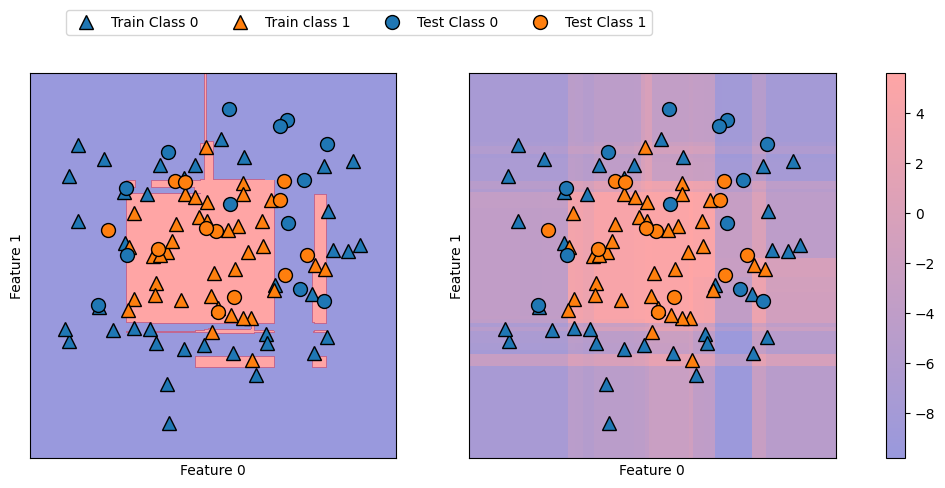

In [29]:
## 绘制 decision boundary, decision scores
import mglearn
from mglearn.tools import plot_2d_separator
from mglearn.tools import plot_2d_scores

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

plot_2d_separator(gbc, X, fill=True, ax=axes[0], alpha=.4, cm=mglearn.cm2)
score_image = plot_2d_scores(gbc, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

plt.colorbar(score_image, ax=axes.tolist())

for ax in axes:
    discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='^', ax=ax)
    discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

axes[0].legend(['Train Class 0', 'Train class 1', 'Test Class 0', 'Test Class 1'], 
               ncol=4, loc=(.1, 1.1))

In [ ]:
.